# Data Wrangling Project

## Gather

#### 1. The WeRateDogs Twitter archive

In [83]:
import requests

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv'
response = requests.get(url)

with open('twitter-archive-enhanced.csv', 'wb') as file:
    file.write(response.content)

In [84]:
import pandas as pd
df_twitter_arch = pd.read_csv('twitter-archive-enhanced.csv')
# df.head()

#### 2. The tweet image predictions

In [85]:
url2 = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url2)

with open('image-predictions.tsv', 'wb') as file:
    file.write(response.content)

In [86]:
df_image_predic = pd.read_table('image-predictions.tsv')

#### 3. Additional data from the Twitter API

In [87]:
import tweepy

consumer_key = 'input here'
consumer_secret = 'input here'
access_token = 'input here'
access_secret = 'input here'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [88]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions

consumer_key = 'input here'
consumer_secret = 'input here'
access_token = 'input here'
access_secret = 'input here'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)
# check if you can connect to the Twitter API

tweet_ids = df_twitter_arch['tweet_id']
#tweepy.TweepyException
#tweet = api.get_status(ID)
#print(tweet.text)

In [ ]:
#### Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
#### Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [89]:
import json

tweet_json = pd.DataFrame(columns=['tweet_id', 'retweet_count', 'favorite_count'])

with open('tweet-json_uda.txt') as f:
    for line in f:
        status  = json.loads(line)
        tweet_id = status['id_str']
        retweet_count = status['retweet_count']
        favorite_count = status['favorite_count']
        tweet_json = tweet_json.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
                                        columns=['tweet_id', 'retweet_count', 'favorite_count']))

        tweet_json = tweet_json.reset_index(drop=True)

## Assessing data

- Visual assessment of each dataframe

In [90]:
df_twitter_arch

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

In [91]:
df_image_predic

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [92]:
tweet_json

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


- info( ) for each dataframe

In [93]:
df_twitter_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [94]:
df_image_predic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [95]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null object
favorite_count    2354 non-null object
dtypes: object(3)
memory usage: 55.2+ KB


#### Twitter archive analysis

In [96]:
# firstly, check if there are any duplicated rows
df_twitter_arch[df_twitter_arch['tweet_id'].duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [97]:
df_twitter_arch.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


- check if any "retweet"

In [98]:
# let's check how many retweeted
df_twitter_arch['retweeted_status_id'].dropna().count()
# those will have to be removed

181

In [99]:
# checking a sample of lines without name to understand if those were recognized correctly or not
pd.set_option('display.max_colwidth', -1)
df_twitter_arch[['text','name']][df_twitter_arch['name'] == 'a'].sample(50)
# it does seem that lines with missing names do not actually have a name in the text field. No correction will be applied to those

,text,name
1017,This is a carrot. We only rate dogs. Please only send in dogs. You all really should know this by now ...11/10 https://t.co/9e48aPrBm2,a
2249,This is a Shotokon Macadamia mix named Cheryl. Sophisticated af. Looks like a disappointed librarian. Shh (lol) 9/10 https://t.co/J4GnJ5Swba,a
2352,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,a
1002,This is a mighty rare blue-tailed hammer sherk. Human almost lost a limb trying to take these. Be careful guys. 8/10 https://t.co/TGenMeXreW,a
1877,C'mon guys. We've been over this. We only rate dogs. This is a cow. Please only submit dogs. Thank you...... 9/10 https://t.co/WjcELNEqN2,a
1004,Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R,a
2348,Here is a Siberian heavily armored polar bear mix. Strong owner. 10/10 I would do unspeakable things to pet this dog https://t.co/rdivxLiqEt,a
2273,This is a northern Wahoo named Kohl. He runs this town. Chases tumbleweeds. Draws gun wicked fast. 11/10 legendary https://t.co/J4vn2rOYFk,a
1785,This is a dog swinging. I really enjoyed it so I hope you all do as well. 11/10 https://t.co/Ozo9KHTRND,a
649,Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq,a


- check rating numerators and denominators

In [100]:
print(df_twitter_arch['rating_numerator'].describe(), "\n")
print(df_twitter_arch['rating_denominator'].describe()) # having a denominator equal to zero might be a prob!

count    2356.000000
mean     13.126486  
std      45.876648  
min      0.000000   
25%      10.000000  
50%      11.000000  
75%      12.000000  
max      1776.000000
Name: rating_numerator, dtype: float64 

count    2356.000000
mean     10.455433  
std      6.745237   
min      0.000000   
25%      10.000000  
50%      10.000000  
75%      10.000000  
max      170.000000 
Name: rating_denominator, dtype: float64


- how many rating tweets have rating denominator different from "10"

In [101]:
# are there tweets with denominator !=10?
len(df_twitter_arch[df_twitter_arch['rating_denominator'] != 10])
# there are 23 of those, they can be cleaned manually or just excluded

23

In [102]:
# get index for each tweet with rating denominator different from 10
df_twitter_arch['rating_denominator'].value_counts()

10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

In [103]:
# display items with denominator different from 10
pd.set_option('display.max_colwidth', -1)
df_twitter_arch['text'][df_twitter_arch['rating_denominator'] != 10]

313     @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho                                                                       
342     @docmisterio account started on 11/15/15                                                                                                                                 
433     The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd                                                                      
516     Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
784     RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…                             
902     Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE                        

- how many ratings have numerator less than 9

In [104]:
# are there tweets with numerator < 9?
len(df_twitter_arch[df_twitter_arch['rating_numerator'] < 9])
# those should be assessed visually (can use Google Spreadsheet)

282

In [105]:
# are there tweets with numerator < 9?
len(df_twitter_arch[df_twitter_arch['rating_numerator'] < 17])
# from a visual assessment on GSheets, it seems all ratings 17/10 have been wrongly recognised

2330

- check the "name" column quality

In [106]:
# check dogs names are recognised properly
df_twitter_arch['name'].value_counts()

None            745
a               55 
Charlie         12 
Lucy            11 
Oliver          11 
Cooper          11 
Tucker          10 
Penny           10 
Lola            10 
Bo              9  
Winston         9  
Sadie           8  
the             8  
Bailey          7  
Daisy           7  
Toby            7  
Buddy           7  
an              7  
Jack            6  
Jax             6  
Scout           6  
Oscar           6  
Rusty           6  
Stanley         6  
Leo             6  
Koda            6  
Bella           6  
Milo            6  
Dave            6  
Bentley         5  
               ..  
Mojo            1  
Beebop          1  
Molly           1  
Devón           1  
Cleopatricia    1  
Harry           1  
Lillie          1  
Shooter         1  
Simba           1  
Kirk            1  
Jerome          1  
Rooney          1  
Edd             1  
Lenox           1  
Dido            1  
Vince           1  
Jiminus         1  
River           1  
Tedrick         1  


- check source column quality

In [107]:
# checking a sample of lines without name to understand if those were recognized correctly or not
pd.set_option('display.max_colwidth', -1)
df_twitter_arch[['text','name']][df_twitter_arch['name'] == 'None'].sample(10)
# it does seem that lines with missing names do not actually have a name in the text field. No correction will be applied to those

,text,name
990,#BarkWeek is getting rather heckin terrifying over here. Doin me quite the spooken. 13/10 (vid by @corgi_zero) https://t.co/eA7k1ZQslA,None
1940,The millennials have spoken and we've decided to immediately demote to a 1/10. Thank you,None
1043,RT @dog_rates: Extremely intelligent dog here. Has learned to walk like human. Even has his own dog. Very impressive 10/10 https://t.co/0Dv…,None
1654,I just want to be friends with this dog. Appears to be into the sports. A true brobean. 10/10 would introduce to mom https://t.co/1Z7Q6svWpe,None
1449,This poor pupper has been stuck in a vortex since last week. Please keep her in your thoughts. 10/10 https://t.co/7ODQWHwYDx,None
1473,What kind of person sends in a pic without a dog in it? So churlish. Neat rug tho 7/10 https://t.co/LSTAwTdTaw,None
170,Here we have an exotic dog. Good at ukulele. Fashionable af. Has two more arms if needed. Is blue. Knows what 'ohana means. 13/10 would pet https://t.co/gEsymGTXCT,None
1767,These little fellas have opposite facial expressions. Both 12/10 https://t.co/LmThv0GWen,None
1788,Reckless pupper here. Not even looking at road. Absolute menace. No regard for fellow pupper lives. 10/10 still cute https://t.co/96IBkOYB7j,None
2006,When you accidentally open up the front facing camera. 10/10 https://t.co/jDXxZARQIZ,None


In [108]:
# checking a sample of lines without name to understand if those were recognized correctly or not
pd.set_option('display.max_colwidth', -1)
df_twitter_arch[['text','name']][df_twitter_arch['name'] == 'a'].sample(10)
# it does seem that lines with missing names do not actually have a name in the text field. No correction will be applied to those

,text,name
1941,This is a heavily opinionated dog. Loves walls. Nobody knows how the hair works. Always ready for a kiss. 4/10 https://t.co/dFiaKZ9cDl,a
1854,Seriously guys?! Only send in dogs. I only rate dogs. This is a baby black bear... 11/10 https://t.co/H7kpabTfLj,a
2311,This is a purebred Bacardi named Octaviath. Can shoot spaghetti out of mouth. 10/10 https://t.co/uEvsGLOFHa,a
1193,People please. This is a Deadly Mediterranean Plop T-Rex. We only rate dogs. Only send in dogs. Thanks you... 11/10 https://t.co/2ATDsgHD4n,a
801,Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn,a
1737,Guys this really needs to stop. We've been over this way too many times. This is a giraffe. We only rate dogs.. 7/10 https://t.co/yavgkHYPOC,a
2125,This is a Rich Mahogany Seltzer named Cherokee. Just got destroyed by a snowball. Isn't very happy about it. 9/10 https://t.co/98ZBi6o4dj,a
2264,This is a southwest Coriander named Klint. Hat looks expensive. Still on house arrest :(\n9/10 https://t.co/IQTOMqDUIe,a
2314,This is a golden Buckminsterfullerene named Johm. Drives trucks. Lumberjack (?). Enjoys wall. 8/10 would hug softly https://t.co/uQbZJM2DQB,a
1785,This is a dog swinging. I really enjoyed it so I hope you all do as well. 11/10 https://t.co/Ozo9KHTRND,a


In [109]:
df_twitter_arch['source'].nunique() # there are only 4 unique sources, the description could be simplified and it could be made categorical

4

In [110]:
print(df_twitter_arch['source'].unique())

[ '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'
 '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>'
 '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>'
 '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>']


- check existance of tweet_ids in all dataframes

In [111]:
df_twitter_arch['tweet_id'].isin(df_image_predic['tweet_id']).value_counts()

True     2075
False    281 
Name: tweet_id, dtype: int64

##### breed prediction dataframe

In [112]:
df_image_predic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [113]:
df_image_predic[df_image_predic['tweet_id'].duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


##### Twitter re-tweet counts

In [114]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null object
favorite_count    2354 non-null object
dtypes: object(3)
memory usage: 55.2+ KB


In [115]:
tweet_json.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Define Issues
#### Quality

1. (Merge the three dataframes into one) Drop useless columns
1. 181 posts are "retweets" --> those will have to be excluded
2. the "timestamp" column should be converted from "string" to "datetime"
3. there are tweets with very high rating numerator. From a visual analysis in GoogleSheets, tweets with rating numerator > 17 indicate there are not ratings -->  those will have to be checked and then corrected or excluded
4. there are tweets with rating denominator != 10 --> those will have to be checked and then corrected or excluded

5. The "source" column can be simplified and made categorical (it takes only 4 different values)

7. Sort any naming issue
8. Remove unnecessary columns

#### Tidiness
1. As they have same observation units (tweet_id) it will be possible to merge the 3 dataframes into one
2. After cleaning the quality issues, the Dogtionary columns can be shrank in one column having categorical value (doggo, foofer, pupper and puppo)

## Clean Issues

#### Create copies of files at first

In [116]:
df1 = df_twitter_arch.copy()
df2 = df_image_predic.copy()
df3 = tweet_json.copy()

#### 1. Define
1. Merge the three dataframes into one. Drop useless columns


#### 1. Code

In [117]:
m1 = pd.merge(df1, df2, left_on='tweet_id', right_on='tweet_id' , how = 'inner')

In [118]:
m1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 28 columns):
tweet_id                      2075 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2075 non-null object
source                        2075 non-null object
text                          2075 non-null object
retweeted_status_id           81 non-null float64
retweeted_status_user_id      81 non-null float64
retweeted_status_timestamp    81 non-null object
expanded_urls                 2075 non-null object
rating_numerator              2075 non-null int64
rating_denominator            2075 non-null int64
name                          2075 non-null object
doggo                         2075 non-null object
floofer                       2075 non-null object
pupper                        2075 non-null object
puppo                         2075 non-null object
jpg_url                       2075 

In [119]:
m1

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,...,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",...,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",...,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.07650

In [120]:
# this is necessary as df3 column dtype is not consistent with m1's
df3['tweet_id'] = df3['tweet_id'].astype(int)

In [121]:
df_clean = pd.merge(m1, df3, left_on='tweet_id', right_on='tweet_id' , how = 'inner')

#### 1. Test

In [122]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 30 columns):
tweet_id                      2073 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
doggo                         2073 non-null object
floofer                       2073 non-null object
pupper                        2073 non-null object
puppo                         2073 non-null object
jpg_url                       2073 

In [123]:
df_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853,39467
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,...,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,3261,20562
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",...,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,2158,12041
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",...,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,16716,56

#### 2. Define

- Some posts are "retweets" --> those will have to be excluded

#### 2. Code

In [124]:
# let's check how many retweets are left in the new merged dataframe
df_clean['retweeted_status_id'].dropna().count()

79

In [125]:
# let's now drop them from the dataframe
df_clean = df_clean[df_clean['retweeted_status_id'].isnull()]

#### 2. Test

In [126]:
#double check
df_clean['retweeted_status_id'].dropna().count()

0

#### 3. Define

- the "timestamp" column should be converted from "string" to "datetime"

#### 3. Code

In [127]:
df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


#### 3. Test

In [128]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 30 columns):
tweet_id                      1994 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1994 non-null datetime64[ns]
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1994 non-null object
rating_numerator              1994 non-null int64
rating_denominator            1994 non-null int64
name                          1994 non-null object
doggo                         1994 non-null object
floofer                       1994 non-null object
pupper                        1994 non-null object
puppo                         1994 non-null object
jpg_url                       

#### 4. Define
- there are tweets with very high rating. from a visual analysis in GoogleSheets, tweets with rating numerator > 17 indicate there are not ratings -->  those will have to be checked and then corrected or excluded

In [129]:
pd.set_option('display.max_colwidth', -1) # this setting allows to print without truncation
df_clean[df_clean['rating_numerator'] > 17][['text','rating_numerator', 'rating_denominator']]

,text,rating_numerator,rating_denominator
345,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
415,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
558,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
614,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
734,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
802,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,1776,10
924,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1001,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
1022,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
1047,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80


#### 4. Code & Test

In [130]:
# this command is necessary to manage non-integer ratings
df_clean['rating_numerator'] = df_clean['rating_numerator'].astype('float');

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [131]:
df_clean.loc[345, 'text']

'The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd'

The post image shows seven dogs. Hence we will divide the rating by 7

In [132]:
df_clean.at[345,'rating_denominator'] = 70/7
df_clean.at[345,'rating_numerator'] = 84/7

In [133]:
#df_clean.at[433,'rating_denominator']
df_clean.at[345,'rating_numerator']

12.0

In [134]:
df_clean.loc[415, 'text']

'Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx'

this one cannot be accessed. It should be decided whether it is best to drop it or keep it depending on the scope of the data cleaning.

In [135]:
# rating is unuseable, let's clean it
df_clean.drop([415], inplace = True);

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


as the ultimate scope is not to clean the whole dataset but to show ability in various cleaning techniques, the manual cleaning will stop here.

#### 5. Define
- there are tweets with rating denominator != 10 --> those will have to be checked and then corrected or excluded

In [136]:
pd.set_option('display.max_colwidth', -1) # this setting allows to print without truncation
df_clean[df_clean['rating_denominator'] != 10][['text','rating_numerator', 'rating_denominator']]

,text,rating_numerator,rating_denominator
734,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165.0,150
876,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9.0,11
924,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204.0,170
967,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4.0,20
1001,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50.0,50
1022,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99.0,90
1047,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80.0,80
1065,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45.0,50
1131,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60.0,50
1207,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,44.0,40


#### 5. Code

Each line should be corrected manually.
I will go through some examples

In [137]:
# this command is necessary to manage non-integer ratings
df_clean['rating_denominator'] = df_clean['rating_denominator'].astype('float');

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [138]:
df_clean.loc[734, 'text']

'Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE'

this one cannot be accessed. I'll divide numerator and denominator by 15 as it probably referred to a pic of 15 dogs.

In [139]:
df_clean.at[734,'rating_denominator'] = 150/10
df_clean.at[734,'rating_numerator'] = 165/10

In [140]:
df_clean.at[876,'rating_denominator'] = 14
df_clean.at[876,'rating_numerator'] = 10

... and so on.

#### 5. Test

In [141]:
pd.set_option('display.max_colwidth', -1) # this setting allows to print without truncation
df_clean[df_clean['rating_denominator'] != 10][['text','rating_numerator', 'rating_denominator']]

,text,rating_numerator,rating_denominator
734,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,16.5,15.0
876,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",10.0,14.0
924,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204.0,170.0
967,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4.0,20.0
1001,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50.0,50.0
1022,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99.0,90.0
1047,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80.0,80.0
1065,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45.0,50.0
1131,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60.0,50.0
1207,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,44.0,40.0


#### 6. Define
- the "source" can be simplified and made categorical (it takes only 4 different values)

#### 6. Code

In [142]:
df_clean['source'].nunique()
df_clean['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1954
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     28  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

In [143]:
df_clean['source'].unique()

array([ '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'], dtype=object)

In [144]:
df_clean['source'].replace(df_clean['source'].unique()[0], 'iPhone', inplace = True)
#df_clean['source'].replace(df_clean['source'].unique()[1], 'vine', inplace = True)
df_clean['source'].replace(df_clean['source'].unique()[1], 'Twitter Web Client', inplace = True)
#df_clean['source'].replace(df_clean['source'].unique()[2], 'TweetDeck', inplace = True)

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [145]:
df_clean['source'] = df_clean['source'].astype('category');

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


#### 6. Test

In [146]:
df_clean['source'].value_counts()

iPhone                                                                                 1954
Twitter Web Client                                                                     28  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

In [147]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 2072
Data columns (total 30 columns):
tweet_id                      1993 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1993 non-null datetime64[ns]
source                        1993 non-null category
text                          1993 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1993 non-null object
rating_numerator              1993 non-null float64
rating_denominator            1993 non-null float64
name                          1993 non-null object
doggo                         1993 non-null object
floofer                       1993 non-null object
pupper                        1993 non-null object
puppo                         1993 non-null object
jpg_url                 

#### 7. Define

- Sort any naming issue

We will sort the "a" and "an"'s that have been recognised as names


#### 7. Code

In [148]:
df_clean['name'].value_counts()

None       546
a          55 
Charlie    11 
Cooper     10 
Lucy       10 
Oliver     10 
Tucker     9  
Penny      9  
Winston    8  
Sadie      8  
Daisy      7  
Lola       7  
Toby       7  
the        7  
Bella      6  
an         6  
Koda       6  
Stanley    6  
Jax        6  
Bo         6  
Chester    5  
Bailey     5  
Louis      5  
Leo        5  
Buddy      5  
Rusty      5  
Scout      5  
Oscar      5  
Dave       5  
Milo       5  
          ..  
DayZ       1  
Ozzy       1  
Jareld     1  
Emma       1  
Crimson    1  
Mona       1  
Chubbs     1  
Striker    1  
Aubie      1  
Butters    1  
Bloo       1  
Shooter    1  
Kirk       1  
Jerome     1  
Rooney     1  
Edd        1  
Maddie     1  
Lenox      1  
Dido       1  
Vince      1  
Jim        1  
Pipsy      1  
Jiminus    1  
River      1  
Simba      1  
Tedrick    1  
Dallas     1  
Rizzy      1  
Banjo      1  
Venti      1  
Name: name, Length: 936, dtype: int64

In [149]:
df_clean[df_clean['name'] == 'a'].index

Int64Index([  50,  524,  647,  822,  824,  833,  859,  995, 1005, 1122, 1131,
            1141, 1147, 1159, 1262, 1475, 1518, 1580, 1581, 1604, 1605, 1646,
            1663, 1677, 1716, 1756, 1787, 1837, 1846, 1849, 1867, 1873, 1881,
            1910, 1917, 1930, 1936, 1940, 1953, 1967, 1973, 1982, 1991, 2005,
            2021, 2028, 2031, 2044, 2051, 2064, 2065, 2067, 2069, 2070, 2071],
           dtype='int64')

In [150]:
df_clean.loc[df_clean['name'] == 'a', 'name'] = 'None'
df_clean.loc[df_clean['name'] == 'an', 'name'] = 'None'

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


#### 7. Test

In [151]:
df_clean['name'].value_counts()

None       607
Charlie    11 
Cooper     10 
Oliver     10 
Lucy       10 
Penny      9  
Tucker     9  
Winston    8  
Sadie      8  
Daisy      7  
Lola       7  
the        7  
Toby       7  
Stanley    6  
Bella      6  
Bo         6  
Koda       6  
Jax        6  
Rusty      5  
Buddy      5  
Bailey     5  
Louis      5  
Leo        5  
Chester    5  
Scout      5  
Oscar      5  
Milo       5  
Dave       5  
Winnie     4  
Bear       4  
          ..  
DayZ       1  
Ozzy       1  
Jareld     1  
Emma       1  
Crimson    1  
Mona       1  
Deacon     1  
Striker    1  
Aubie      1  
Butters    1  
Bloo       1  
Shooter    1  
Kirk       1  
Jerome     1  
Rooney     1  
Edd        1  
Maddie     1  
Lenox      1  
Dido       1  
Vince      1  
Jim        1  
Pipsy      1  
Jiminus    1  
River      1  
Simba      1  
Tedrick    1  
Dallas     1  
Rizzy      1  
Banjo      1  
Venti      1  
Name: name, Length: 934, dtype: int64

#### 8. Define

- Remove unnecessary columns

#### 8. Code

In [152]:
df_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'retweet_count', 'favorite_count'],
      dtype='object')

In [153]:
df_clean.drop(['in_reply_to_status_id', 
               'in_reply_to_user_id',
               'retweeted_status_id',
               'img_num',
               'favorite_count'], axis = 1, inplace=True)


/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


#### 8. Test

In [154]:
df_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'jpg_url', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3',
       'p3_conf', 'p3_dog', 'retweet_count'],
      dtype='object')

### Tidyness
#### 1. Define
1) melt the "dog category" columns into one<br>
2) create one "master" dataset. this was already done before working on quality issues. The reason being it is much easier to handle only one dataframe

#### 1. Clean

In [155]:
# from https://knowledge.udacity.com/questions/124876

import numpy as np

df_clean.doggo.replace('None', '', inplace=True)
df_clean.doggo.replace(np.NaN, '', inplace=True)
df_clean.floofer.replace('None', '', inplace=True)
df_clean.floofer.replace(np.NaN, '', inplace=True)
df_clean.pupper.replace('None', '', inplace=True)
df_clean.pupper.replace(np.NaN, '', inplace=True)
df_clean.puppo.replace('None', '', inplace=True)
df_clean.puppo.replace(np.NaN, '', inplace=True)

df_clean['dog_stages'] = df_clean.text.str.extract('(doggo|floofer|pupper|puppo)', expand = True)

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [156]:
df_clean.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace = True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


#### 1.Test

In [157]:
pd.set_option('display.max_colwidth', -1)
df_clean[df_clean['dog_stages'] == 'floofer'].sample(3)[['text', 'dog_stages']]

,text,dog_stages
41,Meet Grizzwald. He may be the floofiest floofer I ever did see. Lost eyes saving a schoolbus from a volcano erpuption. 13/10 heroic as h*ck https://t.co/rf661IFEYP,floofer
623,Atlas rolled around in some chalk and now he's a magical rainbow floofer. 13/10 please never take a bath https://t.co/nzqTNw0744,floofer
469,This is Doc. He takes time out of every day to worship our plant overlords. 12/10 quite the floofer https://t.co/azMneS6Ly5,floofer


In [158]:
df_clean['dog_stages']#.value_counts()

0       NaN   
1       NaN   
2       NaN   
3       NaN   
4       NaN   
5       NaN   
6       NaN   
7       NaN   
8       NaN   
9       doggo 
10      NaN   
11      NaN   
12      puppo 
13      NaN   
14      puppo 
15      NaN   
16      NaN   
17      NaN   
18      NaN   
19      NaN   
20      NaN   
21      NaN   
22      NaN   
23      NaN   
24      NaN   
25      NaN   
26      NaN   
27      NaN   
28      pupper
29      NaN   
       ...    
2043    NaN   
2044    NaN   
2045    NaN   
2046    NaN   
2047    NaN   
2048    NaN   
2049    NaN   
2050    NaN   
2051    NaN   
2052    NaN   
2053    NaN   
2054    NaN   
2055    NaN   
2056    NaN   
2057    NaN   
2058    NaN   
2059    NaN   
2060    NaN   
2061    NaN   
2062    NaN   
2063    NaN   
2064    NaN   
2065    NaN   
2066    NaN   
2067    NaN   
2068    NaN   
2069    NaN   
2070    NaN   
2071    NaN   
2072    NaN   
Name: dog_stages, Length: 1993, dtype: object

In [159]:
# Now store the clean dataframe into a new file
df_clean.to_csv('df_clean.csv', encoding='utf-8', index=False)

## Analyse and Visualize data

- You must produce at least three (3) insights and one (1) visualization.
- You must clearly document the piece of assessed and cleaned (if necessary) data used to make each analysis and visualization

In [160]:
# find the most common name
df_clean.name.value_counts()

None       607
Charlie    11 
Cooper     10 
Oliver     10 
Lucy       10 
Penny      9  
Tucker     9  
Winston    8  
Sadie      8  
Daisy      7  
Lola       7  
the        7  
Toby       7  
Stanley    6  
Bella      6  
Bo         6  
Koda       6  
Jax        6  
Rusty      5  
Buddy      5  
Bailey     5  
Louis      5  
Leo        5  
Chester    5  
Scout      5  
Oscar      5  
Milo       5  
Dave       5  
Winnie     4  
Bear       4  
          ..  
DayZ       1  
Ozzy       1  
Jareld     1  
Emma       1  
Crimson    1  
Mona       1  
Deacon     1  
Striker    1  
Aubie      1  
Butters    1  
Bloo       1  
Shooter    1  
Kirk       1  
Jerome     1  
Rooney     1  
Edd        1  
Maddie     1  
Lenox      1  
Dido       1  
Vince      1  
Jim        1  
Pipsy      1  
Jiminus    1  
River      1  
Simba      1  
Tedrick    1  
Dallas     1  
Rizzy      1  
Banjo      1  
Venti      1  
Name: name, Length: 934, dtype: int64

#### Insight #1
The most common name for a dog in this twitter page is
- Charlie

In [161]:
df_clean['p1'].value_counts()

golden_retriever             138
Labrador_retriever           95 
Pembroke                     88 
Chihuahua                    79 
pug                          54 
chow                         41 
Samoyed                      40 
toy_poodle                   38 
Pomeranian                   38 
malamute                     29 
cocker_spaniel               27 
French_bulldog               26 
Chesapeake_Bay_retriever     23 
miniature_pinscher           22 
seat_belt                    21 
Siberian_husky               20 
German_shepherd              20 
Staffordshire_bullterrier    19 
Maltese_dog                  18 
Shetland_sheepdog            18 
Eskimo_dog                   18 
teddy                        18 
beagle                       17 
Shih-Tzu                     17 
Rottweiler                   17 
Cardigan                     17 
Lakeland_terrier             16 
kuvasz                       16 
Italian_greyhound            16 
web_site                     15 
          

Part of this code has been taken from
https://github.com/Abhishek20182/Wrangle-and-Analyze-Data/blob/master/wrangle_act.ipynb

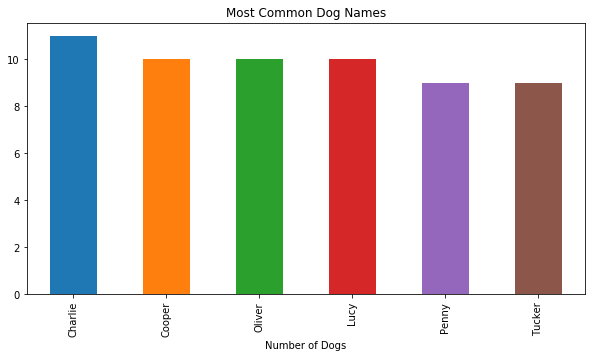

In [174]:
# plot the most common names, excluding the first and most common entry ("None")
df_clean['name'].value_counts()[1:7].plot('bar', figsize=(10,5), title='Most Common Dog Names').set_xlabel("Number of Dogs");    

#### Insight #2
The most common breed for a dog in this twitter page is
- Golden Retriever

In [162]:
df_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'jpg_url', 'p1', 'p1_conf', 'p1_dog',
       'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'retweet_count',
       'dog_stages'],
      dtype='object')

In [163]:
df_clean[df_clean['retweet_count'] == df_clean['retweet_count'].max()]

,tweet_id,timestamp,source,text,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,dog_stages
851,744234799360020481,2016-06-18 18:26:18,iPhone,Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,NaN,NaN,https://twitter.com/dog_rates/status/744234799360020481/video/1,13.0,10.0,None,...,0.825333,True,ice_bear,0.044681,False,whippet,0.018442,True,79515,doggo


#### Insight #3
The tweet with the highest number of retweeds is "the doggo realizing you can stand in a swimming pool".
The URL could be found here.

https://twitter.com/dog_rates/status/744234799360020481/video/1